In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
import thinplate as tps

In [3]:
def show_warped(img, warped):
    fig, axs = plt.subplots(1, 2, figsize=(16,8))
    axs[0].axis('off')
    axs[1].axis('off')
    axs[0].imshow(img[...,::-1], origin='upper')
    axs[0].scatter(c_src[:, 0]*img.shape[1], c_src[:, 1]*img.shape[0], marker='+', color='black')
    axs[1].imshow(warped[...,::-1], origin='upper')
    axs[1].scatter(c_dst[:, 0]*warped.shape[1], c_dst[:, 1]*warped.shape[0], marker='+', color='black')
    plt.show()

In [4]:
def warp_image_cv(img, c_src, c_dst, dshape=None):
    dshape = dshape or img.shape
    theta = tps.tps_theta_from_points(c_src, c_dst, reduced=True)
    grid = tps.tps_grid(theta, c_dst, dshape)
    mapx, mapy = tps.tps_grid_to_remap(grid, img.shape)
    return cv2.remap(img, mapx, mapy, cv2.INTER_CUBIC)

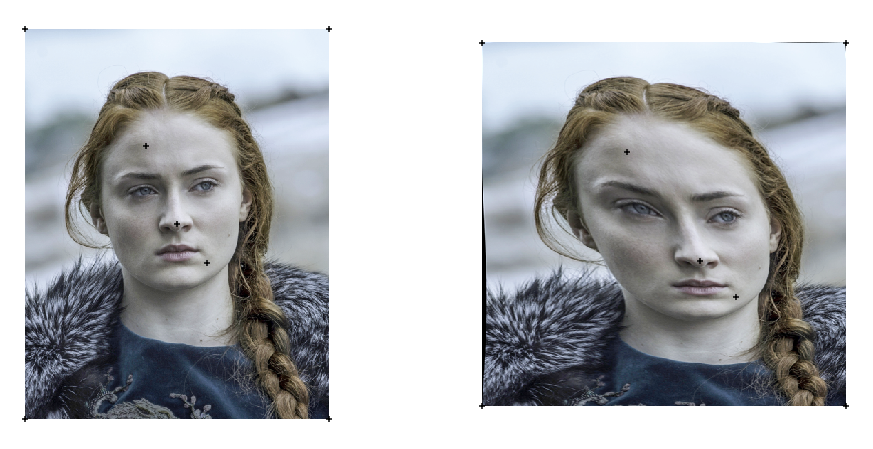

In [5]:
import cv2
img = cv2.imread('image1.png')

c_src = np.array([
    [0.0, 0.0],
    [1., 0],
    [1, 1],
    [0, 1],
    [0.4, 0.3],
    [0.5, 0.5],
    [0.6, 0.6],
])

c_dst = np.array([
    [0., 0],
    [1., 0],    
    [1, 1],
    [0, 1],
    [0.4, 0.3],
    [0.6, 0.6],
    [0.7, 0.7],
])
    
warped = warp_image_cv(img, c_src, c_dst, dshape=(512, 512))
show_warped(img, warped)

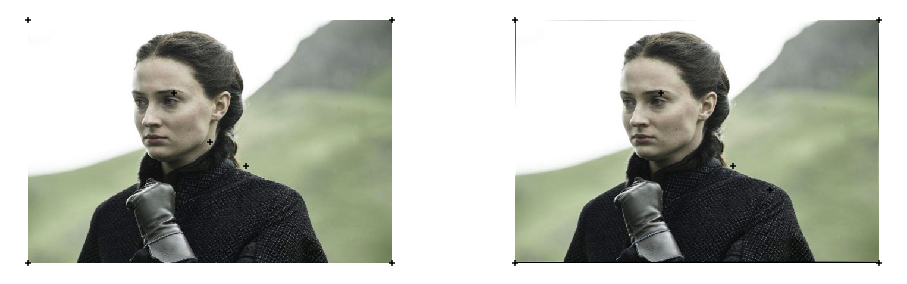

In [39]:
img2 = cv2.imread('image.jpg')
img3 = cv2.imread('82d19a794eace01a919705ead19c6bf4b75433cb_hq.jpg')

v_example=np.array([[0.0, 0.0],
    [1., 0],
    [1, 1],
    [0, 1],
                    [307, 552], [318, 645], [331, 737], [352, 825], [399, 899], [474, 953], [556, 997], [633, 1032], [702, 1043], [756, 1025], [789, 969], [824, 912], [854, 852], [881, 787], [904, 721], [903, 653], [895, 590], [451, 497], [506, 464], [571, 450], [638, 460], [699, 486], [775, 496], [814, 481], [852, 479], [887, 488], [912, 513], [744, 552], [758, 591], [773, 631], [789, 672], [692, 716], [725, 725], [755, 734], [779, 729], [799, 721], [536, 542], [577, 527], [614, 530], [640, 560], [609, 557], [573, 553], [781, 577], [816, 556], [847, 557], [868, 579], [846, 582], [817, 579], [581, 798], [652, 775], [714, 768], [744, 776], [773, 771], [797, 787], [807, 821], [787, 865], [760, 891], [728, 894], [695, 886], [637, 857], [599, 801], [709, 800], [740, 805], [767, 805], [791, 821], [763, 850], [734, 853], [701, 849]]
                  )
v_input = np.array([[0.0, 0.0],
    [1., 0],
    [1, 1],
    [0, 1],
                    [179, 145], [178, 157], [178, 170], [182, 183], [188, 194], [194, 205], [202, 217], [206, 229], [216, 233], [232, 233], [252, 226], [273, 217], [291, 205], [303, 189], [307, 169], [307, 150], [308, 130], [176, 123], [178, 119], [184, 119], [191, 121], [197, 124], [212, 123], [224, 118], [238, 116], [253, 118], [265, 124], [205, 138], [203, 149], [201, 159], [198, 170], [193, 178], [199, 181], [205, 182], [212, 181], [220, 179], [183, 139], [186, 134], [193, 135], [199, 140], [193, 142], [186, 142], [228, 139], [234, 133], [242, 133], [252, 135], [244, 140], [235, 141], [195, 199], [198, 194], [202, 192], [206, 193], [211, 192], [223, 195], [235, 198], [224, 203], [214, 206], [208, 206], [203, 206], [199, 203], [197, 198], [203, 197], [207, 198], [212, 198], [231, 198], [213, 198], [207, 199], [203, 198]]
                  )

# warped = warp_image_cv(img2, v_example, v_input)
# show_warped(img2, warped)

warped = warp_image_cv(img3, v_input, v_example)
show_warped(img3, warped)

In [10]:
delta = c_src - c_dst
print(delta)

cx = np.column_stack((c_dst, delta[:, 0]))
cy = np.column_stack((c_dst, delta[:, 1]))

print(cx,cy)
print(delta[:, 0])

[[ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [ 0.   0. ]
 [-0.1 -0.1]
 [-0.1 -0.1]]
[[ 0.   0.   0. ]
 [ 1.   0.   0. ]
 [ 1.   1.   0. ]
 [ 0.   1.   0. ]
 [ 0.4  0.3  0. ]
 [ 0.6  0.6 -0.1]
 [ 0.7  0.7 -0.1]] [[ 0.   0.   0. ]
 [ 1.   0.   0. ]
 [ 1.   1.   0. ]
 [ 0.   1.   0. ]
 [ 0.4  0.3  0. ]
 [ 0.6  0.6 -0.1]
 [ 0.7  0.7 -0.1]]
[ 0.   0.   0.   0.   0.  -0.1 -0.1]
